# Balance Between Bio-Insight and Spatial Smoothness

## Loading Packages

In [24]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Loading Data

In [31]:
# Column chart data
df_num = {
    'Num': ['ATAC', 'H3K4me3', 'H3K27ac', 'H3K27me3'],
    'SpaKnit': [13, 12, 12, 12],
    'SpatialGlue': [12, 10, 11, 12],
    'STAGATE': [2, 6, 7, 6]
}

# Read line chart data from Excel
excel_data = pd.read_excel('moran_scores_output.xlsx', sheet_name='Averages')

# Select the three methods we need
selected_methods = ['SpaKnit', 'SpatialGlue', 'STAGATE']
df_moran = {
    'Num': ['ATAC', 'H3K4me3', 'H3K27ac', 'H3K27me3']
}

# Extract Moran scores for the selected methods
for method in selected_methods:
    df_moran[method] = excel_data.loc[excel_data['Method'] == method].iloc[0, 1:5].tolist()

## Ploting

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


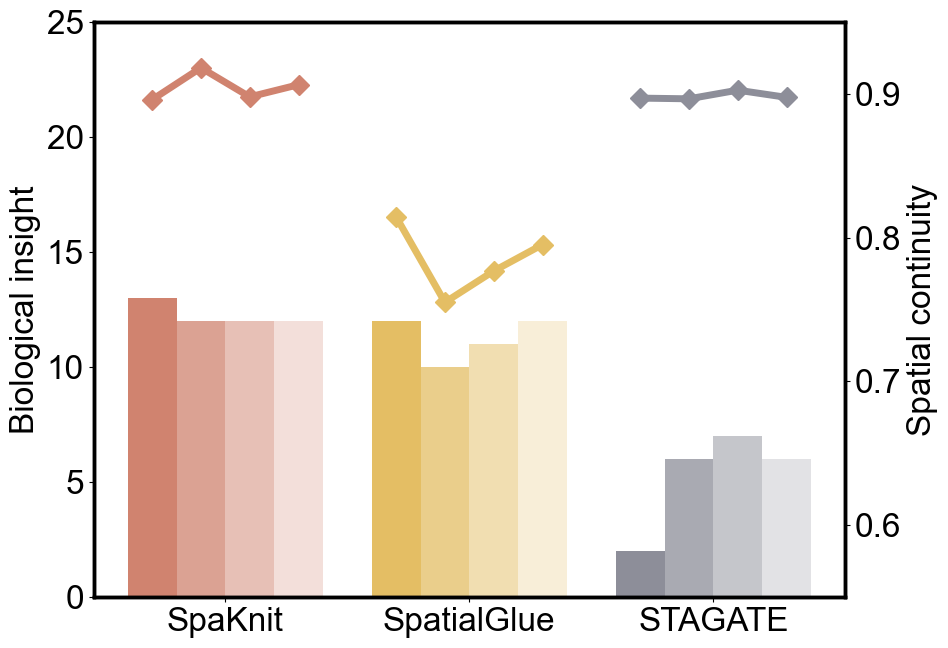

In [34]:
# Set the global font to Arial
plt.rcParams['font.family'] = 'Arial'

# Set the width of the bars
bar_width = 0.2

# Set the index
methods = selected_methods
index = np.arange(len(methods))

# Set the main color palette
colors = ['#d0836f', '#e4be64', '#8d8e99']

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 7))  # Slightly increase the figure size

# Set the unified font size
font_size = 24
plt.rcParams.update({'font.size': font_size})

# Draw the bar chart
for i, num in enumerate(df_num['Num']):
    for j, method in enumerate(methods):
        ax1.bar(index[j] - bar_width * (len(df_num['Num']) // 2 - i - 0.5), 
                df_num[method][i], 
                bar_width, 
                color=colors[j], 
                alpha=1 - i * 0.25)

# Set the primary axis (left y-axis)
ax1.set_xticks(index)
ax1.set_xticklabels(methods)
ax1.set_ylabel('Biological insight', fontsize=font_size)
ax1.set_ylim(0, 25)  # Set the primary axis range to 0-25
ax1.tick_params(axis='both', labelsize=font_size)

# Create the secondary axis
ax2 = ax1.twinx()

# Draw the line chart (using solid square markers)
for j, method in enumerate(methods):
    x_positions = [index[j] - bar_width * (len(df_num['Num']) // 2 - i - 0.5) for i in range(len(df_num['Num']))]
    ax2.plot(x_positions, df_moran[method], 
             marker="D", linestyle='-', color=colors[j], 
             linewidth=5, markersize=10, markerfacecolor=colors[j])

# Set the secondary axis (right y-axis)
ax2.set_ylabel('Spatial continuity', fontsize=font_size)
ax2.set_ylim(0.55, 0.95)  # Set the secondary axis range to 0.55-0.95
ax2.yaxis.set_major_locator(plt.MultipleLocator(0.1))  # Set the y-axis spacing to 0.1
ax2.tick_params(axis='y', labelsize=font_size)

# Remove all legends
ax1.legend().remove()
ax2.legend().remove()

# Thicken the figure border
for ax in [ax1, ax2]:
    for spine in ax.spines.values():
        spine.set_linewidth(2.5)
        spine.set_color('black')

# Adjust the layout
plt.tight_layout()

# Save the figure
plt.savefig('Balance.png', dpi=500)
plt.savefig('Balance.eps')

# Display the figure
plt.show()